# <font color="#36648B">Linear Regression</font>

## <font color="#36648B">Introduction</font>

Let's assume that we have a set of pairs $({\bf x}_{i}, t_{i})$, with $t_{i}$ a real valued variable, and want to predict the value of $t_{i}$ from ${\bf x}_{i}$ using the following linear model:

$$y_{i} = f({\bf x}_{i}) = {\bf w}^{t} {\bf x}_{i} + b,$$

where $y_{i}$ is the model estimate of $t_{i}$ for ${\bf x}_{i}$. The model depends on a set of parameters $\theta = \{{\bf w}, b\}$ that must be tuned in order to obtain a good approximation of the target variable $t$. The general procedure is to find the parameters that minimize the sum of squared errors over the training data:

$$E = \sum_{i}\frac{1}{2}(y_{i} - t_{i})^{2}.$$

This problem has an analytic solution, but we will consider here a numerical solution using the **gradient descent** technique. 

In [1]:
import math

# Sum of squared errors
def sse(x_values, y_values, w, b):
  error = 0
  
  for x, y in zip(x_values, y_values):
    y_hat = w * x + b
    error += math.pow(y_hat - y, 2)
  error = error / 2
  
  return error

## <font color="#36648B">Linear regression in 1D</font>

As a first example we will consider a problem in 1D, where both $x_{i}$ and $t_{i}$ are scalar variables. In this case the model is simply:

$$y_{i} = w x_{i} + b.$$

The following code creates a set of 100 data points $(x_{i}, t_{i})$, with $x_{i} \in [0, 10]$ and $t_{i}$ normally distributed around $2x_{i}+1$.

In [2]:
import numpy as np

# Parameters:
w = 2.0
b = 1.0
xmin = 0.0
xmax = 10.0
noise = 2.0
n = 100

# Randomly generated problem data:
x = xmin + np.random.rand(n)*(xmax - xmin)
t = w*x + b + np.random.randn(n)*noise

And the following code shows how the data are distributed in the plane $(x, t)$, together with the model (without noise) used to generate the data: $t = 2x + 1$. 

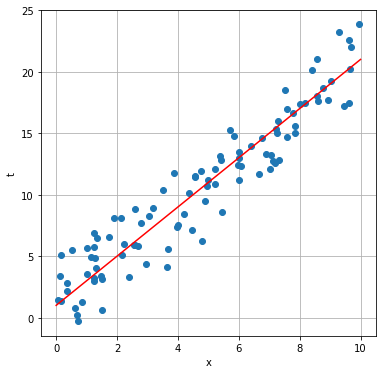

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(x, t, 'o')
plt.plot([xmin, xmax], [w*xmin + b, w*xmax + b], 'r-')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

And the sum of squared errors is:

In [4]:
sse(x, t, w, b)

187.974158993617

## <font color="#36648B">Gradient descent</font>

To solve the linear regression model, we must find the model parameters $w$ and $b$ that minimize the sum of squared errors for all the data points:

$$E = \sum_{i}\frac{1}{2}(y_{i} - t_{i})^{2}.$$

We will use a technique known as **gradient descent** which, starting from a random guess of the parameters, performs small steps in the direction that reduces the error most. This direction is given by the negative of the gradient. For example, if we start from parameters $(w_{0}, b_{0})$, in the next step the parameters will be updated to:

$$(w_{1}, b_{1}) = (w_{0}, b_{0}) - \eta \nabla_{(w, b)} E.$$

That is:

$$w_{1} = w_{0} - \eta \frac{\partial E}{\partial w},$$

$$b_{1} = b_{0} - \eta \frac{\partial E}{\partial b}.$$

In the above expressions the symbol $\eta$ is a positive constant called **learning rate** which determines the step size. These parameter updates are performed until convergence.

For the linear regression model, the partial derivatives of $E$ with respect to the model parameters are easy to obtain:

$$\frac{\partial E}{\partial w} = \sum_{i}(y_{i} - t_{i})x_{i},$$

$$\frac{\partial E}{\partial b} = \sum_{i}(y_{i} - t_{i}).$$

And so the update rules for $w$ and $b$ are:

$$w_{t+1} = w_{t} - \eta \sum_{i}(y_{i} - t_{i})x_{i},$$

$$b_{t+1} = b_{t} - \eta  \sum_{i}(y_{i} - t_{i}).$$

Let us apply this model to our problem data. The first thing to do is to initialize the model parameters $(w, b)$ to random values:

In [5]:
w = np.random.randn()
b = np.random.randn()

We don't expect that this initial random guess provides any good approximation of $t$ given $x$, as demonstrated by the following piece of code:

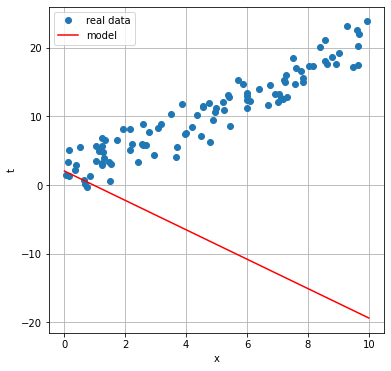

In [6]:
plt.figure(figsize=(6, 6))
plt.plot(x, t, 'o', label='real data')
plt.plot([xmin, xmax], [w*xmin + b, w*xmax + b], 'r-', label='model')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

We must perform several gradient descent steps before the algorithm converges to a good solution:

In [7]:
num_iters = 8 # number of iterations
eta = 0.0001  # learning rate
for i in range(num_iters):
    y = w*x + b
    y_minus_t = y - t
    dw = np.sum(y_minus_t*x)
    db = np.sum(y_minus_t)
    w -= eta*dw 
    b -= eta*db 

If we plot the new solution we observe a much better approximation of the data points by the linear model:

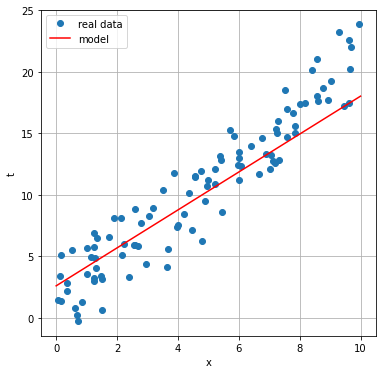

In [8]:
plt.figure(figsize=(6, 6))
plt.plot(x, t, 'o', label='real data')
plt.plot([xmin, xmax], [w*xmin + b, w*xmax + b], 'r-', label='model')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

It is interesting to see how the model converges to the optimal solution. The following code shows this evolution, starting from a new random guess of the parameters:

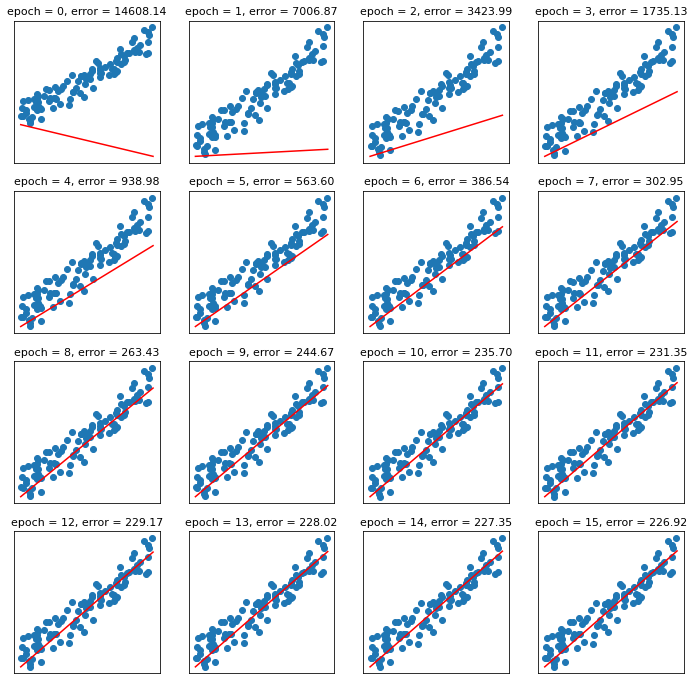

In [9]:
w = np.random.randn()
b = np.random.randn()

num_iters = 16
eta = 0.0001

plt.figure(figsize=(12,12))

for i in range(num_iters):
    error = sse(x, t, w, b)
    
    plt.subplot(4, 4, i+1)
    plt.plot(x, t, 'o')
    plt.plot([xmin, xmax], [w*xmin + b, w*xmax + b], 'r-')
    plt.xticks([])
    plt.yticks([])
    plt.title("epoch = %d, error = %0.2f" % (i, error), fontsize=11)
    
    y = w*x + b
    y_minus_t = y - t
    dw = np.sum(y_minus_t*x)
    db = np.sum(y_minus_t)
    w -= eta*dw
    b -= eta*db

plt.show()

Finally, we can observe this evolution in the $(w, b)$ plane:

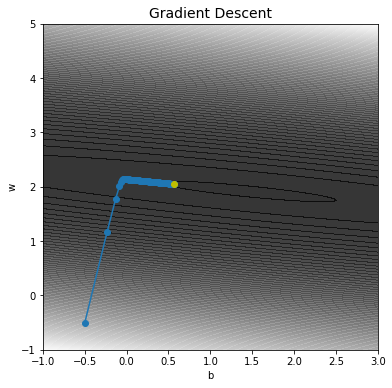

In [10]:
w = -0.5
b = -0.5

whistory = [w]
bhistory = [b]

num_iters = 100
eta = 0.0002

for i in range(num_iters):
    y = w*x + b
    
    y_minus_t = y - t
    dw = np.sum(y_minus_t*x)
    db = np.sum(y_minus_t)
    w -= eta*dw
    b -= eta*db

    whistory.append(w)
    bhistory.append(b)
    
wvalues = np.arange(-1., 5.01, 0.01)
bvalues = np.arange(-1., 3.01, 0.01)
bgrid, wgrid = np.meshgrid(bvalues, wvalues)

y = wgrid[:, :, None]*x[None, None, :] + bgrid[:, :, None]
egrid = np.sum((y-t[None, None, :])**2, axis=2)

plt.figure(figsize=(6, 6))
plt.contourf(bgrid, wgrid, egrid, 100, cmap='gray', alpha=0.8)
plt.plot(bhistory, whistory, '-o')
plt.plot(bhistory[-1], whistory[-1], 'yo')
plt.xlabel('b')
plt.ylabel('w')
plt.title("Gradient Descent", fontsize=14)
plt.show()

### <font color="#36648B">Questions</font>

- What happens if we increase the learning rate? Test with $\eta = 0.0005$.
- What happens if we decrease the learning rate? Test with $\eta = 0.00001$.


## <font color="#36648B">Linear regression in arbitrary dimension</font>

In a more general situation we have a set of data $({\bf x}_{i}, t_{i})$ with ${\bf x}_{i} \in \mathbb{R}^{d}$. The model is:

$$y_{i} = {\bf w}^{t} {\bf x}_{i} + b,$$

where ${\bf w}$ is also a $d$-dimensional vector. Starting from random initial parameters $({\bf w}_{0}, b_{0})$, the update rules are now:

$${\bf w}_{t+1} = {\bf w}_{t} - \eta \nabla_{{\bf w}} E,$$

$$b_{t+1} = b_{t} - \eta \frac{\partial E}{\partial b},$$

where the gradients are given by the following expressions:

$$\nabla_{{\bf w}} E = \sum_{i}(y_{i} - t_{i}){\bf x}_{i},$$


$$\frac{\partial E}{\partial b} = \sum_{i}(y_{i} - t_{i}).$$


### <font color="#36648B">Exercise</font>

- Extend the previous example to the multidimensional case.